In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as signal
import scipy.ndimage as nd

from skimage import io
from skimage import color
import time


Image shape:  (598, 282)
Image type:  float64
Min/Max: 0.0 1.0


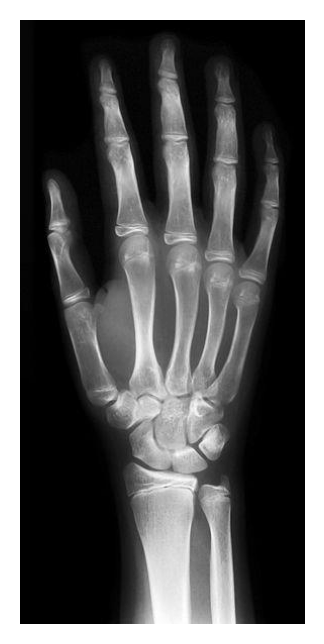

In [ ]:

image = io.imread("foto.png")

#rgb2gray
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) # normalize to [0-1]
image = normalize(image)
image = color.rgb2gray(image)


print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

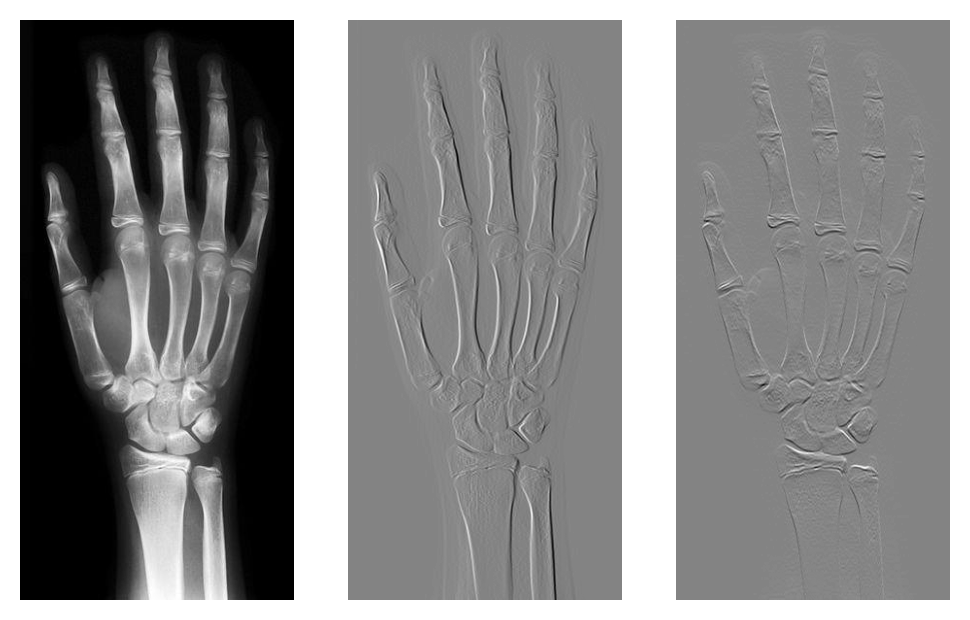

In [ ]:
gradient_y, gradient_x = np.gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def our_gradient_boundaries(image):
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
  
  # TO DO 1 - implement forward/backward gradient on image boundaries
  # df(x, y) / dx = (f(x + step, y) - f(x - step, y)) / 2*step #Centrale
  # df(x, y) / dx = (f(x + step, y) - f(x, y)) /step #Forward
  # df(x, y) / dx = (f(x, y) - f(x - step, y)) /step #Backward

  gradient_y [1:-1, : ] = (image[2:,:] - image[0:-2,:]) /2
  gradient_x [ :, 1:-1 ] = (image[:,2:] - image[:,0:-2]) /2
  
  gradient_y[0,:] = (image[1,:] - image[0,:])/1
  gradient_x[:,0] = (image[:,1] - image[:,0])/1

  gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1
  gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1

  return gradient_y, gradient_x

In [ ]:
def our_gradient_loops(image):
  
  gradient_y = np.zeros(image.shape)
  gradient_x = np.zeros(image.shape)
 
  for i in range (1,image.shape[0] -1): 
    for j in range (1,image.shape[1] -1): 
      gradient_y [i,j ] = (image[i+1,j] - image[i-1,j]) /2
      gradient_x [ i,j ] = (image[i,j+1] - image[i,j-1]) /2
  
  gradient_y[0,:] = (image[1,:] - image[0,:])/1
  gradient_x[:,0] = (image[:,1] - image[:,0])/1

  gradient_y[-1,:] = (image[-1, :] - image[-2,:])/1
  gradient_x[:,-1] = (image[:, -1] - image[:,-2])/1 

  return gradient_y, gradient_x

Our gradient without loops - time:  0.0026590824127197266


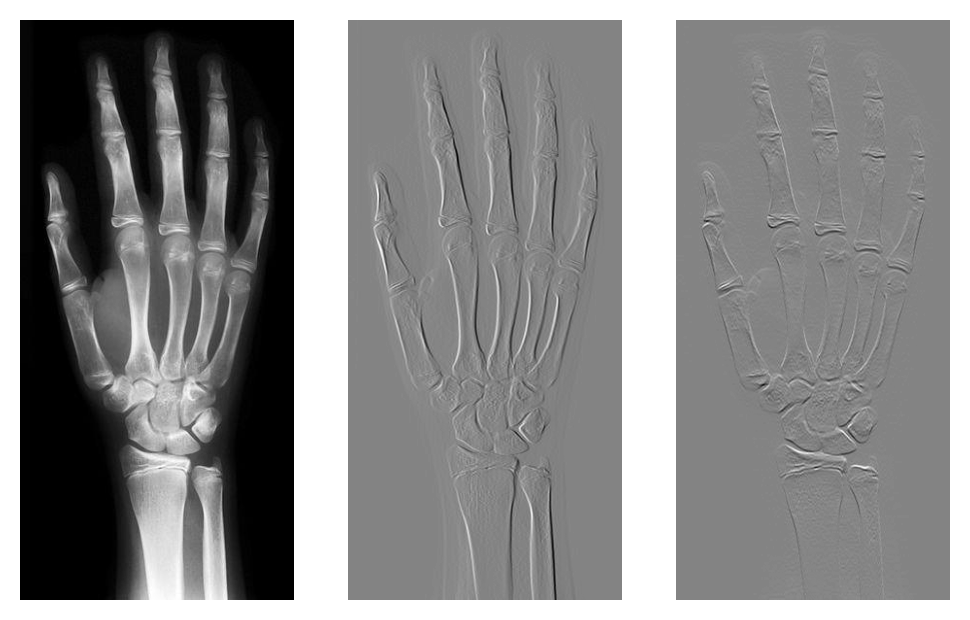

Our gradient with loops - time:  0.4395914077758789


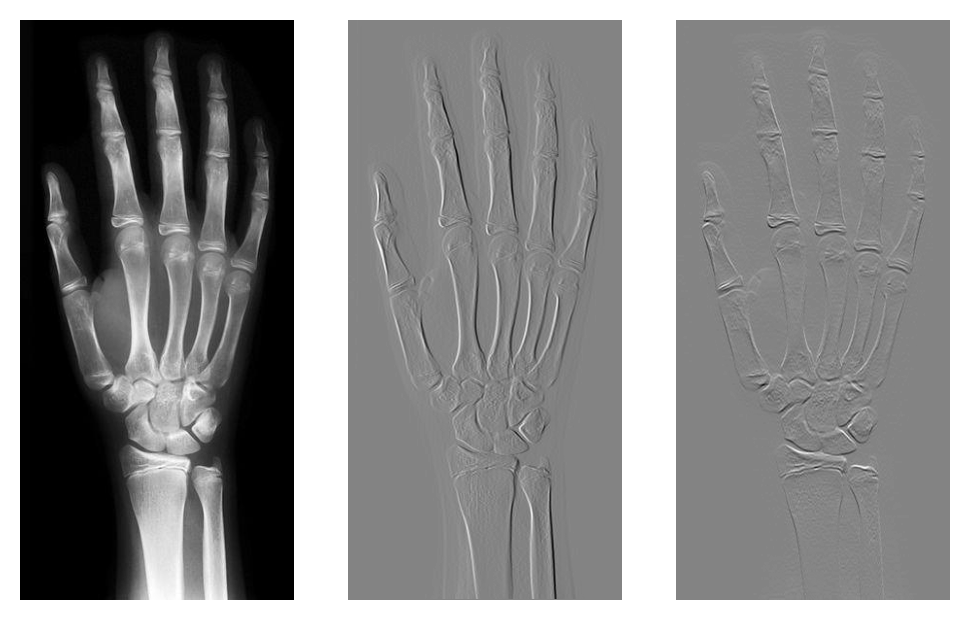

In [ ]:
start = time.time()
gradient_y, gradient_x = our_gradient_boundaries(image)
end = time.time()
print("Our gradient without loops - time: ", end - start )

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

start = time.time()
gradient_y, gradient_x = our_gradient_loops(image)
end = time.time()
print("Our gradient with loops - time: ", end - start )

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
def our_gradient_2(image):
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x) / 2
  gradient_y = signal.correlate2d(image, window_y) / 2
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

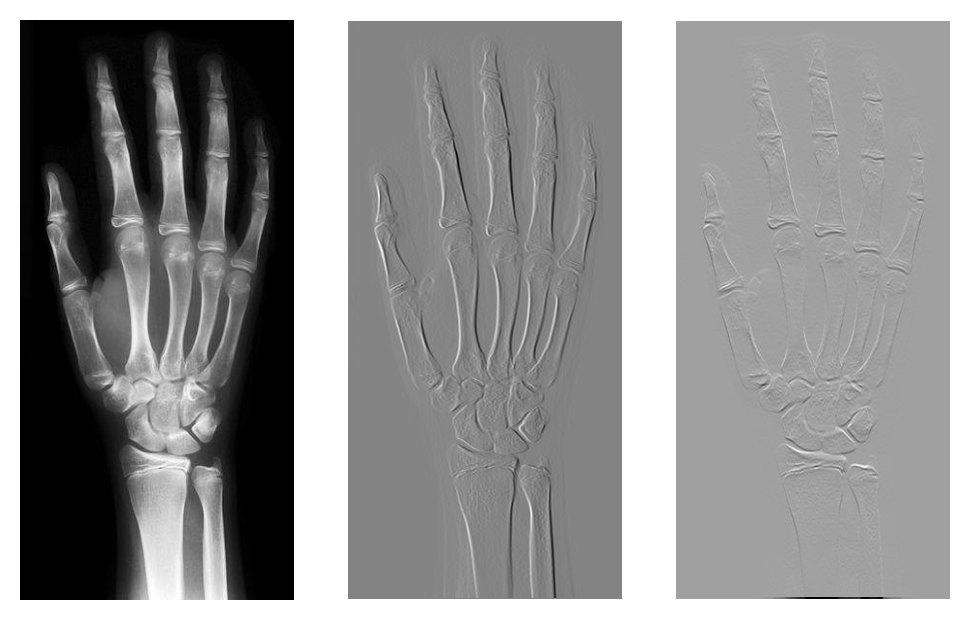

In [ ]:
gradient_y, gradient_x = our_gradient_2(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def sobel_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

def prewitt_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

In [ ]:
gradient_y, gradient_x = sobel_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradient_y, gradient_x = prewitt_gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradient_magnitude = lambda gradient_x, gradient_y: np.sqrt(gradient_x**2 + gradient_y**2)

g_mag = gradient_magnitude(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_mag, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


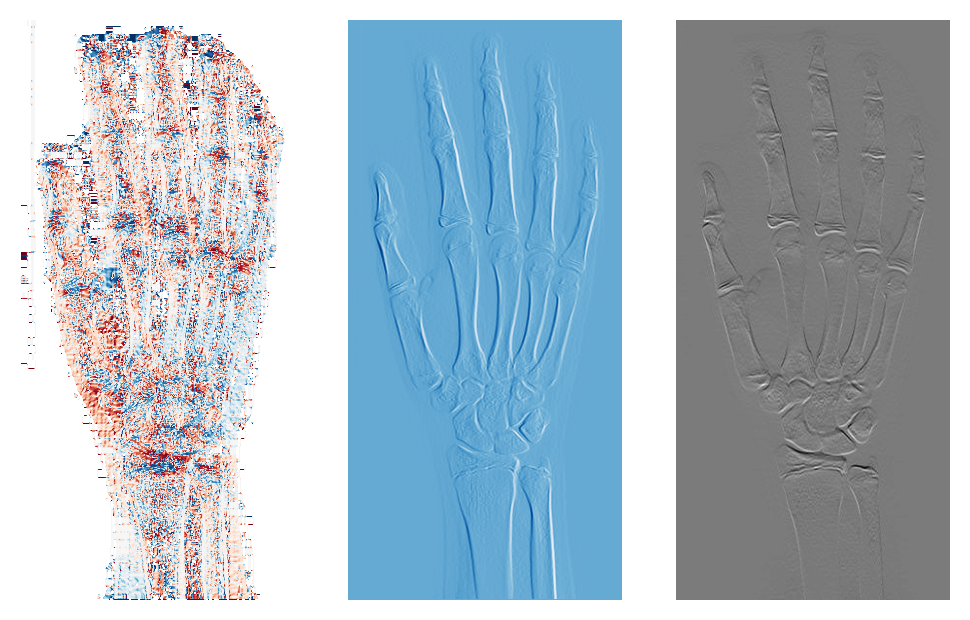

In [ ]:
# TO DO 3 - implement gradient angle (using color map)
gradient_angle = lambda gradient_x, gradient_y: np.arctan(gradient_y/gradient_x)

g_angle = gradient_angle(gradient_x, gradient_y)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(g_angle, cmap='RdBu')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x,cmap='Blues')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
def laplacian(image):
  window = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]                     
  ])
  laplacian_image = signal.correlate2d(image, window)
  img_reshape = np.pad(image, 1, 'edge')
  img_with_laplacian = laplacian_image + img_reshape 
  return laplacian_image, img_with_laplacian

In [ ]:
laplacian_image, image_with_laplacian = laplacian(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_plus_laplacian, cmap='gray')
plt.axis('off')
plt.show()